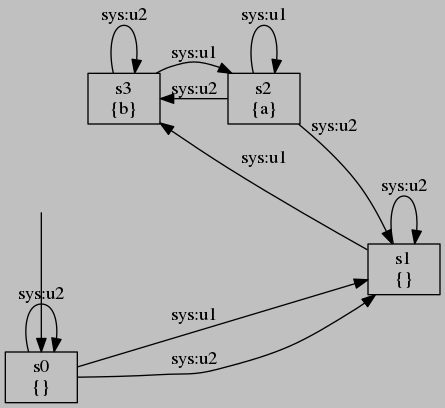

True

In [1]:
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

from tulip import transys, spec, synth, dumpsmach
from fill_fts import *

fts = transys.FTS()
fts.atomic_propositions.add_from(['a', 'b'])

fts.add_nodes_from(['s0', 's1', 's2', 's3'])
fts.sys_actions.add_from(['u1', 'u2'])

fts.add_node('s2', ap={'a'})
fts.add_node('s3', ap={'b'})

fts.states.initial.add('s0')

fts.add_edge('s0', 's1', sys_actions='u1')
fts.add_edge('s0', 's0', sys_actions='u2')
fts.add_edge('s0', 's1', sys_actions='u2')

fts.add_edge('s1', 's1', sys_actions='u2')
fts.add_edge('s1', 's3', sys_actions='u1')

fts.add_edge('s2', 's1', sys_actions='u2')
fts.add_edge('s2', 's3', sys_actions='u2')

fts.add_edge('s2', 's2', sys_actions='u1')

fts.add_edge('s3', 's2', sys_actions='u1')
fts.add_edge('s3', 's3', sys_actions='u2')

fts.plot()

ENVIRONMENT VARIABLES:
	(none)

SYSTEM VARIABLES:
	(none)

FORMULA:
ASSUMPTION:
GUARANTEE:
    LIVENESS
	  []<>(a)
	& []<>(b)

removed 0 nodes from 9 total


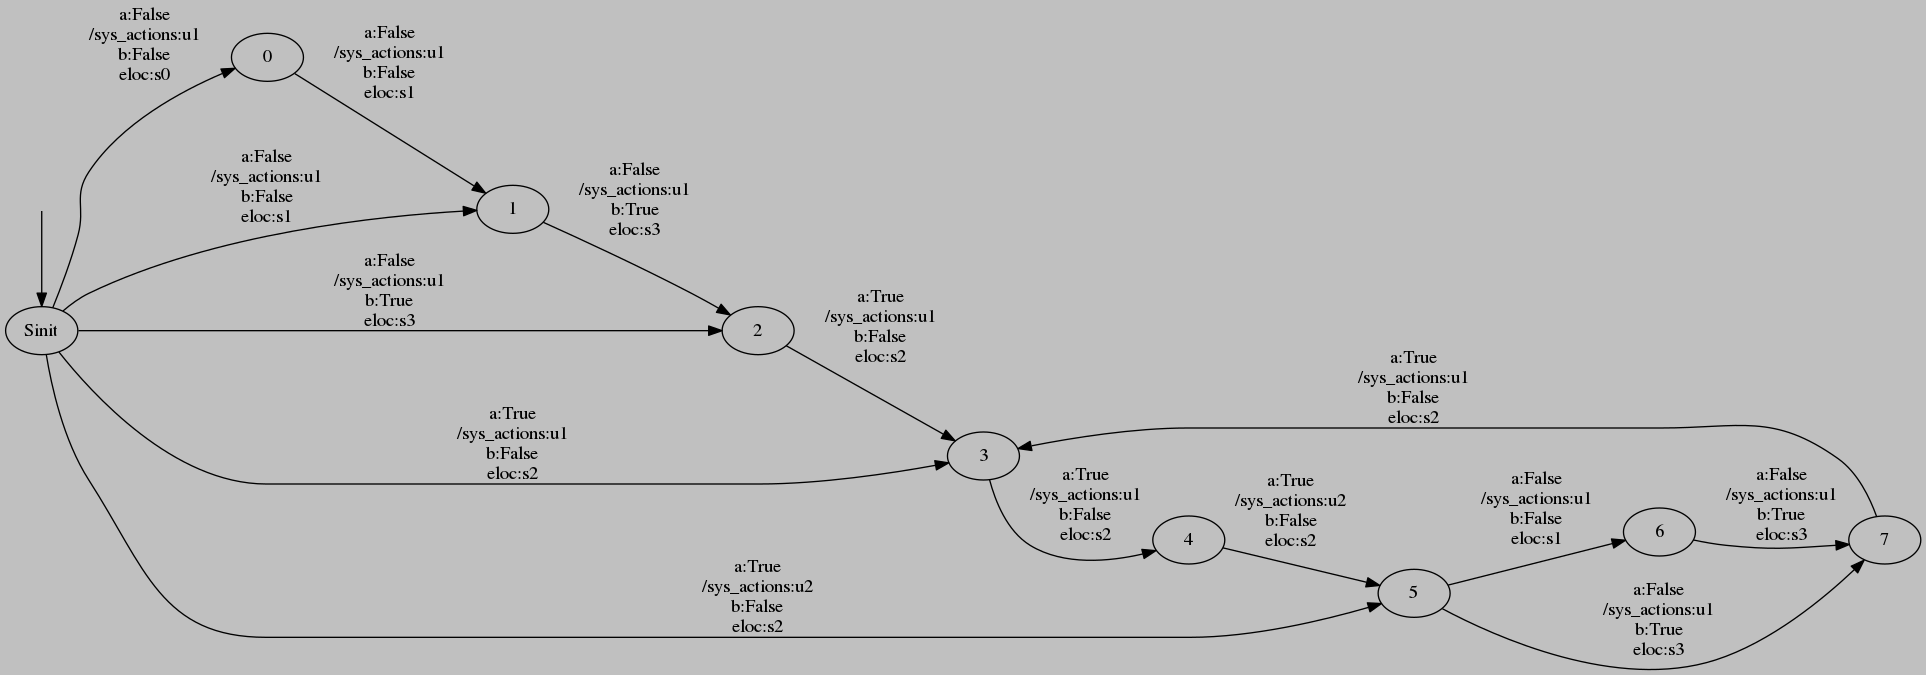

True

In [2]:
formula = spec.GRSpec(sys_prog={'a', 'b'})
formula.qinit = '\E \A'
formula.moore = False
fts.owner = 'env'

print formula.pretty()

cont = synth.synthesize(formula, env=fts)

cont.plot()